# This noteboook is aimed at modelling returns of Bitcoin using traditional econometrics approach

## Importing libraries

In [1]:
# basic data-handling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# libraries used in dataimports and modifications
from tvDatafeed import TvDatafeed, Interval
import pandas_ta as ta
import requests
import json
import datetime

In [3]:
# library for statistical analysis
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [4]:
# utilities
import sys
sys.path.append('modules')
import utils

ModuleNotFoundError: No module named 'nltk'

In [ ]:
bitcoin= utils.get_data('BTCUSDT', exchange = 'BINANCE',start_date = "2020-01-01")

In [5]:
twitter = utils.processed_twitter_data()

NameError: name 'utils' is not defined

### Linear Regression

Features - technical indicators.
Reference: https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/


In [9]:
'''
function to calculate technical indicators'''
def technical_indicator(df, column, technical_indicator, length):
    
    if technical_indicator == 'EMA':
        df.ta.ema(close = column, length = length, append = True, lookahead=False)
        
    return df
        
    

In [16]:
bitcoin = technical_indicator(bitcoin, 'close', 'EMA', length = 2)
bitcoin = utils.lag_columns(bitcoin, ['EMA_2'], +1)
bitcoin_modified = utils.calculate_return(bitcoin, ['close','EMA_2_1_days_lagged' ], 1)


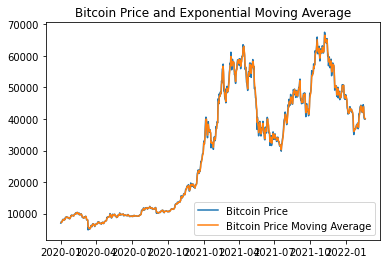

In [17]:
fig, ax = plt.subplots()

ax.plot(bitcoin['datetime'],bitcoin['close'], label = 'Bitcoin Price')
ax.plot(bitcoin['datetime'],bitcoin['EMA_2'], label = 'Bitcoin Price Moving Average')

plt.title("Bitcoin Price and Exponential Moving Average")
plt.legend()

# We need to lag the features to avoid leakage (lookahead bias). That is, you cannot use tomorrow's data to predict the price for tomorrow. We need to use what we know today to predict the price tomorrow.

In [18]:
bitcoin.head()

,datetime,symbol,open,high,low,close,volume,EMA_2,EMA_2_1_days_lagged,close_return,EMA_2_1_days_lagged_return
868,2020-01-01,BINANCE:BTCUSDT,7200.77,7212.50,6924.74,6965.71,31951.483932,NaN,NaN,NaN,NaN
869,2020-01-02,BINANCE:BTCUSDT,6965.49,7405.00,6871.04,7344.96,68428.500451,7155.335000,NaN,0.054445,NaN
870,2020-01-03,BINANCE:BTCUSDT,7345.00,7404.00,7272.21,7354.11,29987.974977,7287.851667,7155.335000,0.001246,NaN
871,2020-01-04,BINANCE:BTCUSDT,7354.19,7495.00,7318.00,7358.75,38331.085604,7335.117222,7287.851667,0.000631,0.018520
872,2020-01-05,BINANCE:BTCUSDT,7357.64,7795.34,7346.76,7758.00,54635.695316,7617.039074,7335.117222,0.054255,0.006486


In [146]:
formula_1 = 'close_return ~ EMA_2_1_days_lagged_return'
res_1 = ols(formula_1, data= bitcoin).fit()

In [149]:
print(res_1.summary())

                             OLS Regression Results                             
Dep. Variable:     close_bitcoin_return   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     5.512
Date:                  Sat, 19 Feb 2022   Prob (F-statistic):             0.0191
Time:                          17:36:24   Log-Likelihood:                 1391.6
No. Observations:                   777   AIC:                            -2779.
Df Residuals:                       775   BIC:                            -2770.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
